In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pandas.core.series import Series
from pandas.io.formats.style import Styler
import seaborn as sns

## use display for html output
from IPython.display import display, HTML

# auto-reload modules
%load_ext autoreload
%autoreload 2

# set pandas display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 1000)

# set dark theme
plt.style.use('dark_background')

In [47]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

num_to_label = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}

def normalize_images(images):
    """Normalize images to [0, 1] range"""
    return images.astype('float32') / 255.0

def load_data():
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    trainX, testX = normalize_images(trainX), normalize_images(testX)
    trainY, testY = to_categorical(trainY), to_categorical(testY)
    return trainX, trainY, testX, testY

def get_label(y: np.ndarray) -> str:
    """Get label from one-hot encoded array"""
    return num_to_label[np.argmax(y)]

In [48]:
trainX, trainY, testX, testY = load_data()

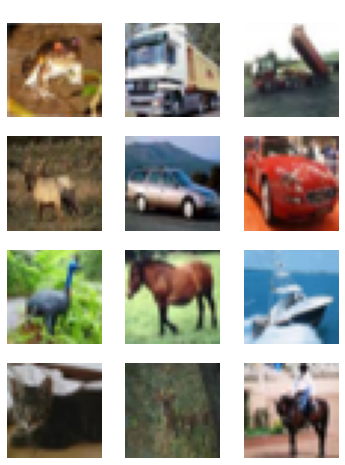

In [49]:
n_rows = 4
n_cols = 3 
plt.figure(figsize=(n_cols * 2, n_rows * 2))
for i in range(n_rows * n_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(trainX[i])
    plt.axis('off')
    plt.title(get_label(trainY[i]))

In [51]:
trainX[0].shape, trainY[0].shape

((32, 32, 3), (10,))

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD

def add_layers(model):
    """Creates a models with layers"""
    model.add(Conv2D(32, (3, 3), activation='relu',
              padding='same', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

def compile_model(model):
    """ Compile the model """
    opt = SGD(learning_rate=0.01, momentum=0.9)
    # sparse_categorical_crossentropy
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_seq_model() -> Sequential:
    """ Create a model """
    model = Sequential()
    model = add_layers(model)
    model = compile_model(model)
    model: Sequential = model
    return model

In [57]:
from sklearn.model_selection import KFold

def evaluate_model(model, X, y):
    """Evaluate a model"""
    scores = list()
    n_folds = 5
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    for train_ix, test_ix in kfold.split(X):
        trainX, testX = X[train_ix], X[test_ix]
        trainY, testY = y[train_ix], y[test_ix]
        model.fit(trainX, trainY, epochs=10, verbose=True)
        _, acc = model.evaluate(testX, testY, verbose=0)
        scores.append(acc)
    return scores

model = create_seq_model()
scores = evaluate_model(model, trainX, trainY)
print(f"Accuracy: {np.mean(scores):.3f} ({np.std(scores):.3f})")

Epoch 1/10
1250/1250 [==============================] - 33s 26ms/step - loss: 1.6680 - accuracy: 0.3986
Epoch 2/10
1250/1250 [==============================] - 31s 25ms/step - loss: 1.3045 - accuracy: 0.5357
Epoch 3/10
1250/1250 [==============================] - 26s 20ms/step - loss: 1.1351 - accuracy: 0.5993
Epoch 4/10
1250/1250 [==============================] - 32s 26ms/step - loss: 1.0037 - accuracy: 0.6446
Epoch 5/10
1250/1250 [==============================] - 30s 24ms/step - loss: 0.8793 - accuracy: 0.6886
Epoch 6/10
1250/1250 [==============================] - 32s 26ms/step - loss: 0.7802 - accuracy: 0.7234
Epoch 7/10
1250/1250 [==============================] - 31s 25ms/step - loss: 0.6768 - accuracy: 0.7606
Epoch 8/10
1250/1250 [==============================] - 32s 26ms/step - loss: 0.5704 - accuracy: 0.7995
Epoch 9/10
1250/1250 [==============================] - 31s 25ms/step - loss: 0.4859 - accuracy: 0.8267
Epoch 10/10
1250/1250 [==============================] - 31s 25m